In [97]:
%run imports.py

In [98]:

import cma
import time

# def run_cmaes(, fitness_func, n_gen, n_pop, tqdm=lambda x: x):
#     net = model().to(device)

#     sol = util.model2vec(net).detach().cpu().numpy()
#     # es.optimize(pheno_fitness)
#     fitdata_gens = []
#     loop = range(n_gen)
#     if tqdm is not None:
#         loop = tqdm(loop)
#     for _ in loop:
#         fitdata = np.array([fitness_wrapper(sol) for sol in sols])
#         fitdata_DA = util.arr_dict2dict_arr(np.array([fitness_wrapper(sol) for sol in sols]))
#         fitdata_gens.append(fitdata)
#         if tqdm is not None:
#             loop.set_postfix({'loss': fitdata_DA['loss'].min()})
            
#     return np.array(fitdata_gens)

In [99]:
def run_evolution_cmaes(pop, optim_fn, n_gen, max_time=None, tqdm=lambda x: x):
    data = []
    es = cma.CMAEvolutionStrategy(pop[0].numpy(), 1e-1, {'popsize':len(pop)})
    
    st = time.time()
    
    i = 0
    while True:
        if (i>n_gen if n_gen is not None else time.time()-st>max_time):
            break
        i += 1
        pop = es.ask()
        pop = np.array(pop)
        fit = optim_fn(torch.from_numpy(pop)).numpy()
        es.tell(pop, fit)
        
        data.append((torch.from_numpy(pop), torch.from_numpy(fit)))
        
    # pops, fits, mrs, fitmrs
    return [torch.stack([d[i] for d in data]) for i in range(len(data[0]))]


In [100]:
n_gen = 100
n_pop = 101
n_dim = 100
std = 10

optim_fn = ackley

In [57]:
%%time
pops, fits = run_evolution_cmaes(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen)
print(fits.min())

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=80821, Thu Nov  4 00:40:17 2021)
tensor(16.7471, dtype=torch.float64)
CPU times: user 4.71 s, sys: 378 ms, total: 5.09 s
Wall time: 3.26 s


In [58]:
%%time
pops, fits, mrs, fitmrs = optim.run_evolution_ours(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen)
print(fits.min())

tensor(13.7974)
CPU times: user 115 ms, sys: 13.6 ms, total: 129 ms
Wall time: 160 ms


In [59]:
33.5/.459

72.98474945533769

In [116]:
results = []
for optim_fn in [ackley, griewank, rastrigin, rosenbrock, sphere, lin_fn]:
    for n_dim, n_gen in zip([2, 30, 100, 1000], [100, 300, 1000, 2500]):
        for std in [1, 10]:
            st = time.time()
            pops, fits, mrs, fitmrs = optim.run_evolution_ours(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen)
            max_time = time.time()-st
#             print(fits.min())
            results.append(fits.min().item())

            print('GA')
            print(f'Ran {len(pops)} Generations in {max_time: .02f} seconds to get fitness of {fits.min().item()}')
#             print(max_time)
            st = time.time()
            pops, fits = run_evolution_cmaes(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen=None, max_time=max_time)
            max_time = time.time()-st
            print('CMA')
            print(f'Ran {len(pops)} Generations in {max_time: .02f} seconds to get fitness of {fits.min().item()}')
#             print(time.time()-st)
#             print(fits.min())
            results.append(fits.min().item())
            
#             print()

            print()

GA
Ran 101 Generations in  0.11 seconds to get fitness of 0.0005645751953125
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 2 (seed=180673, Fri Nov  5 18:34:30 2021)
CMA
Ran 11 Generations in  0.25 seconds to get fitness of 1.856527257195875

GA
Ran 101 Generations in  0.23 seconds to get fitness of 0.001911163330078125
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 2 (seed=246292, Fri Nov  5 18:34:30 2021)
CMA
Ran 18 Generations in  0.25 seconds to get fitness of 5.539631365181208e-05

GA
Ran 301 Generations in  0.26 seconds to get fitness of 1.5019493103027344
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 30 (seed=267177, Fri Nov  5 18:34:31 2021)
CMA
Ran 12 Generations in  0.27 seconds to get fitness of 4.84074333808352

GA
Ran 301 Generations in  0.25 seconds to get fitness of 1.3602409362792969
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 30 (seed=312445, Fri Nov  5 18:34:31 2021)
CMA
Ran 19 Generations in  0.32 seconds to get fitness of 18.704268071480005

GA
R

/Users/akarshkumar0101/Library/Python/3.8/lib/python/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.026381989582099) = 2.7909498602132885 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=6)
  warnings.warn(msg + ' (' +
/Users/akarshkumar0101/Library/Python/3.8/lib/python/site-packages/cma/utilities/utils.py:343: UserWarning: sigma change np.exp(1.025553318709463) = 2.788638039358738 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=9)
  warnings.warn(msg + ' (' +


CMA
Ran 11 Generations in  0.17 seconds to get fitness of -1341847.3138667347

GA
Ran 101 Generations in  0.08 seconds to get fitness of -3.0030481702376178e+19
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 2 (seed=273548, Fri Nov  5 18:37:10 2021)
CMA
Ran 11 Generations in  0.17 seconds to get fitness of -298234.51970689767

GA
Ran 301 Generations in  0.16 seconds to get fitness of nan
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 30 (seed=264427, Fri Nov  5 18:37:11 2021)
CMA
Ran 11 Generations in  0.19 seconds to get fitness of -1841.54472802491

GA
Ran 301 Generations in  0.15 seconds to get fitness of nan
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 30 (seed=297099, Fri Nov  5 18:37:11 2021)
CMA
Ran 11 Generations in  0.21 seconds to get fitness of -347.01128127212877

GA
Ran 1001 Generations in  0.63 seconds to get fitness of nan
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=232662, Fri Nov  5 18:37:12 2021)
CMA
Ran 21 Generations in  0.64 seconds t

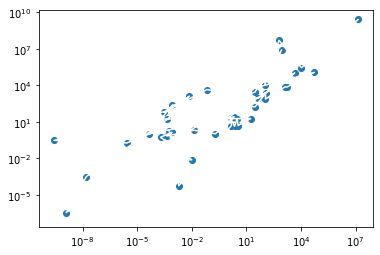

In [131]:
plt.plot(*a.reshape(-1, 2).T, c='w')
plt.scatter(*a.reshape(-1, 2).T)
plt.yscale('log')
plt.xscale('log')


In [134]:

(a[..., 0]< a[..., 1])


array([[[ True, False],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True, False],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [False, False],
        [False, False],
        [False, False]]])

In [117]:
a = np.array(results).reshape(6, 4, 2, 2)
# a = np.array(results).reshape(-1, 2)
a[..., 0] <a[..., 1]

array([[[ True, False],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True, False],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True]],

       [[ True,  True],
        [False, False],
        [False, False],
        [False, False]]])

In [175]:
from tqdm.notebook import tqdm

In [259]:

results = []
# for optim_fn in [ackley, griewank, rastrigin, rosenbrock, sphere, lin_fn]:
for optim_fn in [ackley, griewank, rastrigin, rosenbrock]:
    for seed in tqdm(range(10)):
        do_seed(seed)
        n_dim, n_gen = 100, 1000
        std = 10

        st = time.time()
        pops, fits, mrs, fitmrs = optim.run_evolution_ours(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen)
        max_time = time.time()-st
    #             print(fits.min())
        results.append(fits.min().item())

    #     print('GA')
    #     print(f'Ran {len(pops)} Generations in {max_time: .02f} seconds to get fitness of {fits.min().item()}')
    #             print(max_time)
        st = time.time()
        pops, fits = run_evolution_cmaes(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen=None, max_time=max_time)
        max_time = time.time()-st
    #     print('CMA')
    #     print(f'Ran {len(pops)} Generations in {max_time: .02f} seconds to get fitness of {fits.min().item()}')
    #             print(time.time()-st)
    #             print(fits.min())
        results.append(fits.min().item())
    #             print()

  0%|          | 0/10 [00:00<?, ?it/s]

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=362807, Sat Nov  6 20:22:25 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=302420, Sat Nov  6 20:22:27 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=412787, Sat Nov  6 20:22:30 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=271471, Sat Nov  6 20:22:34 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=405983, Sat Nov  6 20:22:35 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=403909, Sat Nov  6 20:22:37 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=352862, Sat Nov  6 20:22:39 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=364271, Sat Nov  6 20:22:41 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=342146, Sat Nov  6 20:22:43 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=397301, Sat Nov  6 20:22:45 2021)


  0%|          | 0/10 [00:00<?, ?it/s]

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=444369, Sat Nov  6 20:22:48 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=316327, Sat Nov  6 20:22:52 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=361433, Sat Nov  6 20:22:54 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=335267, Sat Nov  6 20:22:56 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=317865, Sat Nov  6 20:22:59 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=414999, Sat Nov  6 20:23:01 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=341482, Sat Nov  6 20:23:03 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=358441, Sat Nov  6 20:23:05 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=356350, Sat Nov  6 20:23:07 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=290116, Sat Nov  6 20:23:09 2021)


  0%|          | 0/10 [00:00<?, ?it/s]

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=307219, Sat Nov  6 20:23:11 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=322650, Sat Nov  6 20:23:13 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=381084, Sat Nov  6 20:23:14 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=357181, Sat Nov  6 20:23:16 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=341401, Sat Nov  6 20:23:18 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=277606, Sat Nov  6 20:23:20 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=387169, Sat Nov  6 20:23:21 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=383289, Sat Nov  6 20:23:23 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=351589, Sat Nov  6 20:23:25 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=378519, Sat Nov  6 20:23:26 2021)


  0%|          | 0/10 [00:00<?, ?it/s]

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=316459, Sat Nov  6 20:23:28 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=350470, Sat Nov  6 20:23:29 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=370524, Sat Nov  6 20:23:31 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=392765, Sat Nov  6 20:23:32 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=359738, Sat Nov  6 20:23:34 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=431220, Sat Nov  6 20:23:35 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=389132, Sat Nov  6 20:23:37 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=351784, Sat Nov  6 20:23:39 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=302002, Sat Nov  6 20:23:42 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=374768, Sat Nov  6 20:23:45 2021)


In [260]:
a = np.array(results).reshape(4, -1, 2)

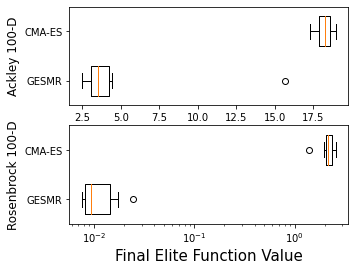

In [261]:
plt.figure(figsize=(5, 4))
plt.subplot(211)
plt.boxplot(a[0], vert=False, widths=[0.6]*2, labels=['GESMR', 'CMA-ES'])
# plt.xlabel('Final Elite Function Value', fontsize=15)
# plt.ylabel('Algorithm')
plt.ylabel(f'Ackley {n_dim}-D', fontsize=12)
# plt.xscale('log')

plt.subplot(212)
plt.boxplot(a[1], vert=False, widths=[0.6]*2, labels=['GESMR', 'CMA-ES'])
plt.xlabel('Final Elite Function Value', fontsize=15)
# plt.ylabel('Algorithm')
plt.ylabel(f'Rosenbrock {n_dim}-D', fontsize=12)
plt.xscale('log')
plt.show()

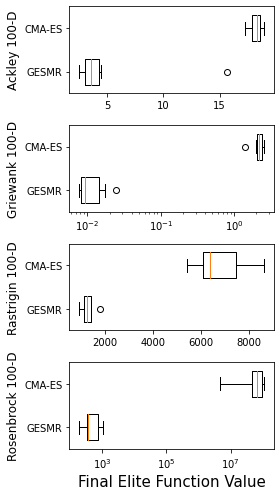

In [265]:
plt.figure(figsize=(4, 7))
plt.subplot(411)
plt.boxplot(a[0], vert=False, widths=[0.6]*2, labels=['GESMR', 'CMA-ES'])
# plt.ylabel('Algorithm')
plt.ylabel(f'Ackley {n_dim}-D', fontsize=12)
# plt.xscale('log')

plt.subplot(412)
plt.boxplot(a[1], vert=False, widths=[0.6]*2, labels=['GESMR', 'CMA-ES'])
# plt.ylabel('Algorithm')
plt.ylabel(f'Griewank {n_dim}-D', fontsize=12)
plt.xscale('log')

plt.subplot(413)
plt.boxplot(a[2], vert=False, widths=[0.6]*2, labels=['GESMR', 'CMA-ES'])
# plt.ylabel('Algorithm')
plt.ylabel(f'Rastrigin {n_dim}-D', fontsize=12)
# plt.xscale('log')

plt.subplot(414)
plt.boxplot(a[3], vert=False, widths=[0.6]*2, labels=['GESMR', 'CMA-ES'])
plt.xlabel('Final Elite Function Value', fontsize=15)
# plt.ylabel('Algorithm')
plt.ylabel(f'Rosenbrock {n_dim}-D', fontsize=12)
plt.xscale('log')

plt.tight_layout()

plt.show()

In [285]:
a.shape
b = a.mean(axis=1)
bstd = a.std(axis=1)

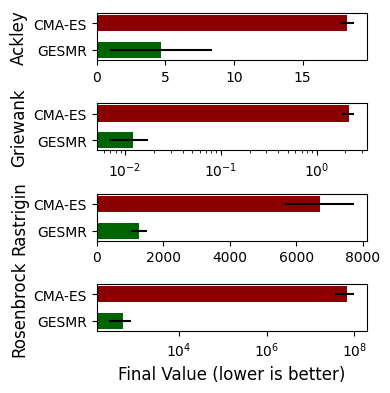

In [326]:
plt.figure(figsize=(4, 4))
plt.subplot(411)

people = ('GESMR', 'CMA-ES')
y_pos = np.arange(len(people))
plt.barh(y_pos, b[0], xerr=bstd[0], height=0.6, align='center', color=['darkgreen', 'darkred'])
plt.yticks(y_pos, people)
plt.ylabel(f'Ackley', fontsize=12)

plt.subplot(412)

people = ('GESMR', 'CMA-ES')
y_pos = np.arange(len(people))
plt.barh(y_pos, b[1], xerr=bstd[1], height=0.6, align='center', color=['darkgreen', 'darkred'])
plt.yticks(y_pos, people)
plt.ylabel('Griewank', fontsize=12)
plt.xscale('log')

plt.subplot(413)

people = ('GESMR', 'CMA-ES')
y_pos = np.arange(len(people))
plt.barh(y_pos, b[2], xerr=bstd[2], height=0.6, align='center', color=['darkgreen', 'darkred'])
plt.yticks(y_pos, people)
plt.ylabel('Rastrigin', fontsize=12)
# plt.xscale('log')

plt.subplot(414)

people = ('GESMR', 'CMA-ES')
y_pos = np.arange(len(people))
plt.barh(y_pos, b[3], xerr=bstd[3], height=0.6, align='center', color=['darkgreen', 'darkred'])
plt.yticks(y_pos, people)
plt.ylabel('Rosenbrock', fontsize=12)
plt.xscale('log')

plt.xlabel('Final Value (lower is better)', fontsize=12)

plt.tight_layout()

plt.savefig('rebuttal.png', dpi=700)
plt.show()

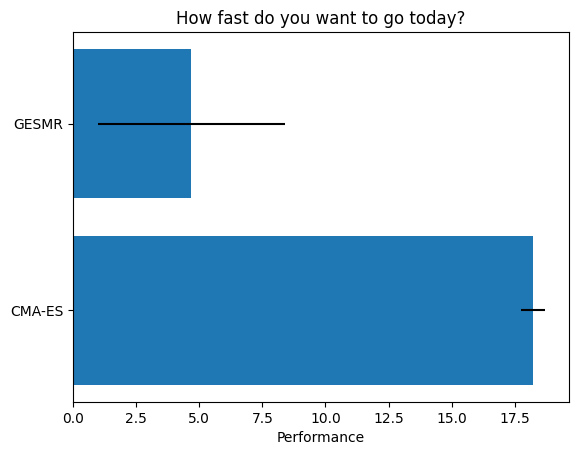

In [291]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
# Example data
people = ('GESMR', 'CMA-ES')
y_pos = np.arange(len(people))
ax.barh(y_pos, b[0], xerr=bstd[0], align='center')
ax.set_yticks(y_pos); ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Performance')
# ax.set_title('How fast do you want to go today?')

plt.show()

In [86]:
n_gen = 10
n_pop = 101
n_dim = 100
std = 10

optim_fn = ackley

tts=[]
n_dims = np.array(range(2, 1000, 30))
for n_dim in n_dims:
    st = time.time()
    pops, fits, mrs, fitmrs = optim.run_evolution_ours(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen)
    tt = time.time()-st
    tts.append(tt)
    
    st = time.time()
    pops, fits = run_evolution_cmaes(torch.randn(n_pop, n_dim)*std, optim_fn, n_gen=n_gen, max_time=None)
    tt = time.time()-st
    tts.append(tt)
    
    

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 2 (seed=148416, Thu Nov  4 01:08:42 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 32 (seed=173422, Thu Nov  4 01:08:42 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 62 (seed=25595, Thu Nov  4 01:08:43 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 92 (seed=128502, Thu Nov  4 01:08:43 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 122 (seed=88921, Thu Nov  4 01:08:43 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 152 (seed=196260, Thu Nov  4 01:08:43 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 182 (seed=65226, Thu Nov  4 01:08:44 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 212 (seed=88813, Thu Nov  4 01:08:44 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 242 (seed=51995, Thu Nov  4 01:08:45 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 272 (seed=88614, Thu Nov  4 01:08:45 2021)
(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 302 (seed=

In [91]:
tts = np.array(tts).reshape(-1, 2)

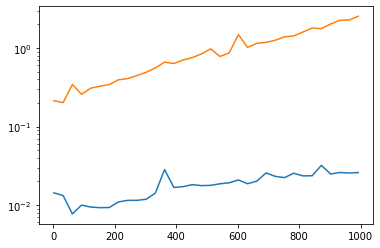

In [96]:
plt.plot(n_dims, tts[:, 0])
plt.plot(n_dims, tts[:, 1])
plt.yscale('log')